<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>

# Astronomy 501: Modern Astronomical Techniques
### Signal Analysis and Statistics of Random Variables

Reading: [Lena Appendices A & B](https://link-springer-com.proxy.lib.umich.edu/content/pdf/bbm%3A978-3-642-21815-6%2F1.pdf)

First, import some libraries.

In [1]:
import matplotlib   # plotting libraries  
import matplotlib.pyplot as plt   # plotting libraries  
import cmath as cm  # complex math
import pylab as pl  # plotting and numerical routines
import numpy as np  # numerical routines 
import matplotlib.cm as cmap  ## color map for 2d plotting
%matplotlib inline  
pi2 = cm.pi * 2.0   # a useful constant: 2 * pi

#### Signal Analysis and the Fourier Transform

In nearly all realistic cases, to apply a Fourier Transform one must use  a <a href="https://en.wikipedia.org/wiki/Discrete_Fourier_transform">discrete Fourier transform</a>:

$$X_k = \sum_{n=0}^{N-1} x_n e^{-2\pi i k n / N}$$

In the above formulism, $X$ and $x$ are both series of complex numbers. $X_k$ describe the amplitudes of a series of sines and cosines in terms of frequency. The $x_n$ do the same, except in terms of time.

As with With every Fourier transform routine, make sure to check the normalization and sign conventions. Note that numpy has its own version that we will also use.

In [2]:
def fourier(x):
    N = len(x)
    fourier = np.zeros(N,dtype=complex)
    for k in range(N):
        fouriern=0
        for n in range(N):
            fouriern += x[n]*cm.exp(-1j*pi2*k*n/N)
        fourier[k]=fouriern
    return fourier

The inverse Fourier transform is defined as:

$$x_n = \frac 1 N \sum_{n=0}^{N-1} X_k e^{2\pi i k n / N}$$

Each ${\displaystyle X_{k}}$ is a complex number that encodes both amplitude and phase of a complex sinusoidal component ${\displaystyle (e^{i2\pi kn/N})}$ of function ${\displaystyle x_{n}.}$ The sinusoid's frequency is k cycles per N samples.

In [3]:
def inv_fourier(X):
    N = len(X)
    inv_fourier = np.zeros(N, dtype=complex)
    for n in range(N):
        inv_fourierk=0
        for k in range(N):
            inv_fourierk += X[k]*cm.exp(1j*pi2*n*k/N)
        inv_fourier[n] = inv_fourierk/N
    return inv_fourier

In [4]:
#What do we need to define?
N = 1024 # degrees (Number of samples)
a = 50 #float(np.random.randint(1, 100))  ## random integer (amplitude) between 0 and 100
k = 5. #float(np.random.randint(1, 50))  ## random integer (frequency) between 0 and 50
p1 = 12 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360
p2 = 256 #float(np.random.randint(0, 360))  ## random integer (phase) between 0 and 360

In [5]:
## print out the sine wave paramaters 
print("Input Sine Wave Paramaters:")
print("frequency = " + str(k))   ## not that strings can be added in python, very convenient
print("amplitude = " + str(a))
print("phase angs = " + str(p1), str(p2))

## make a pure sine wave array
t = np.arange(1,N+1, dtype=complex)/N   ## n/N becomes time, a variable from 0 to 1. Note that it is COMPLEX
fn1 = a * np.sin(pi2* k * t + p1 / 360. * pi2)   ## the pure sine wave 
fn2 = a * np.sin(pi2* k * t + p2 / 360. * pi2)   ## the pure sine wave shifted in phase
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.plot(t,fn1.real)
pl.plot(t,fn2.real, label='Phase Shifted')
pl.xlabel("time",size=18)
pl.ylabel("amplitude",size=18)
plt.legend(fontsize=18)
pl.show()

Input Sine Wave Paramaters:
frequency = 5.0
amplitude = 50
('phase angs = 12', '256')


/usr/local/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In the above plot, we have a measurement in time. We use the FFT to move between time and frequency. How do we get to frequency? We need the $X_k$s via the iFFT.

In [6]:
#Now, use the inverse FFT, since it gets us the frequency amplitudes
fouriertrans1 = inv_fourier(fn1)  ## inverse FFT using our code
fouriertrans2 = inv_fourier(fn2)  ## inverse FFT using our code

(-35, 35)

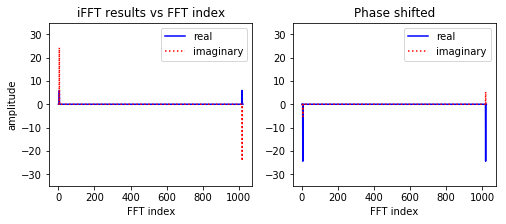

In [7]:
#plot it up
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 3))
ax[0].set_xlabel("FFT index")
ax[0].set_ylabel("amplitude")
ax[0].set_title("iFFT results vs FFT index")
ax[0].plot((fouriertrans1.real),'b',label='real')
ax[0].plot((fouriertrans1.imag),'r:',label='imaginary')
ax[0].legend()
ax[0].set_ylim(-35,35)
ax[1].set_title("Phase shifted")
ax[1].plot((fouriertrans2.real),'b',label='real')
ax[1].plot((fouriertrans2.imag),'r:',label='imaginary')
ax[1].set_xlabel("FFT index")
ax[1].legend()
ax[1].set_ylim(-35,35)

The output of the FFT includes both positive and negative frequency components. You can think of the positive and negative components as right and left going waves.
  
The ${\rm {\bf amplitude}}$ of the waves is given by the quadrature sum of the real and imaginary parts (e.g., the magnitude of the complex FFT).

The FFT index is not easily informative.

Next we create an a frequency array in the same indexing scheme of the FFT.  We do this by identifiying the highest frequnecy that can be encoded within our array (the [Nyqyist-Shannon sampling theorem](https://en.wikipedia.org/wiki/Nyquist%E2%80%93Shannon_sampling_theorem)).  This is called the Nyquist frequency and is calculated as $f_{Nyquist} = 1/T_{sample}/2$, where $T_{sample}$ is the time between samples.

We next make the frequency array and compare it to the FFT index:

('Nyquist frequency: ', 512.0)


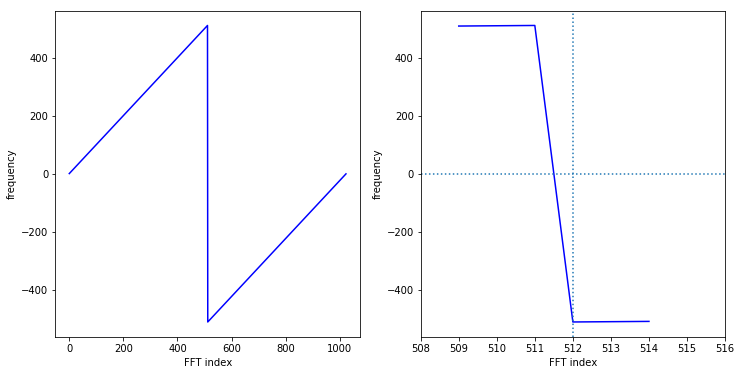

In [8]:
## make an array to represent the frequency
index = np.arange(0,1024,1)
delta_t = (t[1]-t[0]).real  ## the step size for the t grid
freq_nyquist = 1/delta_t/2.
print("Nyquist frequency: ", freq_nyquist)

freq = np.roll(np.linspace(-1,1,N)*freq_nyquist,int(N/2.0)) #Elements that roll beyond the last position are re-introduced at the first.
## plot the freuency array
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_xlabel("FFT index")
ax[0].set_ylabel("frequency")
ax[0].plot(index,freq,'b', label='freq')
ax[1].set_xlabel("FFT index")
ax[1].set_ylabel("frequency")
xmin = 509
xmax = 515
ax[1].plot(index[xmin:xmax],freq[xmin:xmax],'-b', label='freq')
ax[1].axvline(512,ls=':')
ax[1].axhline(0,ls=':')
ax[1].set_xlim(xmin-1,xmax+1)
pl.show()

The zero frequency is on the left and the maximum frequency is near the middle, but not exactly there, but it should be.  The sign of the frequency encodes right vs left going waves.

Now that we have the frequency array we can plot the FFT vs frequency and easily interpret the results.

(-10, 10)

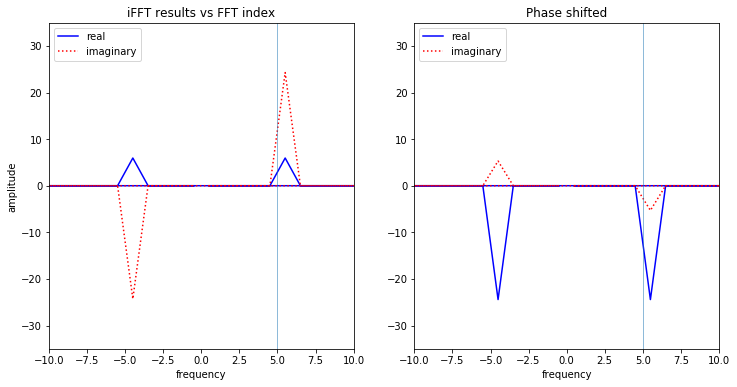

In [9]:
## make a plot of the real and imaginary parts of the FFT
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].set_xlabel("frequency")
ax[0].set_ylabel("amplitude")
ax[0].set_title("iFFT results vs FFT index")
ax[0].plot(freq,(fouriertrans1.real),'b',label='real')
ax[0].plot(freq,(fouriertrans1.imag),'r:',label='imaginary')
ax[0].axvline(k,ls='-',lw=0.5)
ax[0].legend()
ax[0].set_ylim(-35,35)
ax[0].set_xlim(-10,10)
ax[1].set_title("Phase shifted")
ax[1].plot(freq,(fouriertrans2.real),'b',label='real')
ax[1].plot(freq,(fouriertrans2.imag),'r:',label='imaginary')
ax[1].set_xlabel("frequency")
ax[1].axvline(k,ls='-',lw=0.5)
ax[1].legend()
ax[1].set_ylim(-35,35)
ax[1].set_xlim(-10,10)

Now we see the issue earlier from the shift in the FFT index versus frequency. We need to fix that by shifting the index down by a 1/2. We'll let Python do that work later.

<Figure size 432x288 with 0 Axes>

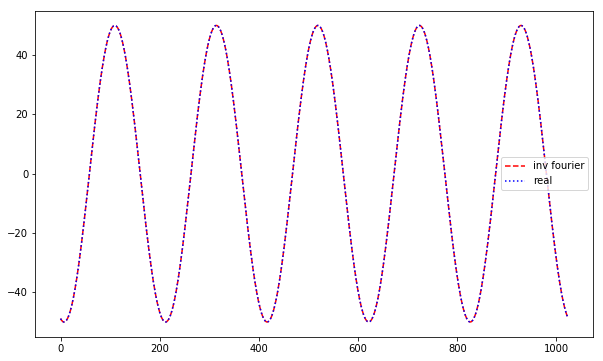

('maximum difference between the results:', 2.8728488854807928e-11, '<- this should be zero within rounding error.')


In [10]:
#invert back
invfouriertrans2 = fourier(fouriertrans2)
pl.clf()
pl.figure(figsize=(10, 6))
pl.plot(invfouriertrans2, 'r--', label='inv fourier')
pl.plot(fn2.real, 'b:', label='real')
plt.legend(loc='best')
pl.show()
print("maximum difference between the results:", np.max(np.abs(invfouriertrans2 - fn2)),"<- this should be zero within rounding error.")

In the final 1-d excercise we check that the Numpy implemntation of the FFT is identical to our implemntation

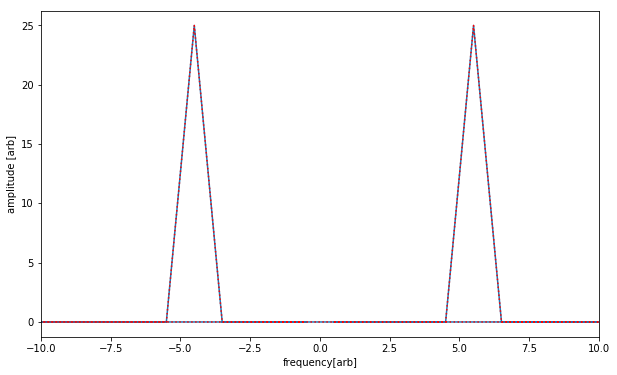

('maximum difference between the results:', 2.1133102793986163e-12, '<- this should be zero within rounding error.')


In [11]:
#Try numpy
ftpl = np.fft.ifft(fn1)       ## FFT using numpy code
## make a plot comparing these functions
pl.figure(figsize=(10, 6))  ## this resizes the figure to make it fit the screen
pl.xlabel("frequency[arb]")
pl.ylabel("amplitude [arb]")
pl.plot(freq,np.abs(ftpl))
pl.plot(freq,np.abs(fouriertrans1),'r:')
plt.xlim(-10,10)
pl.show()
## calculate the maximum difference
print("maximum difference between the results:", np.max(np.abs(fouriertrans1 - ftpl)),"<- this should be zero within rounding error.")

<font color='red'>HW Question 1: Convolution Pairs </font>
    
       Recreate Lena Figure A.6 

In signal processing, we normally use the term "power spectra density" (PSD) as the absolute value of the FT. 

MATPLOTLIB has built-in functions to analyze FTs:

(-10, 10)

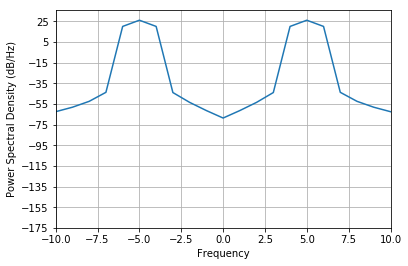

In [12]:
#Try matplotlibs signal processing tools
pl.psd(fn1,1024,N)
pl.xlim(-10,10)

You can see that it handles the 1/2 pixel shift properly. Also note that the power us reported in a more useful log-base-10 space.

<font color='red'>HW Question 2: Annual Temperature Fluctation of France </font>

    Download the weather_data.csv file from the CANVAS site and conduct a FFT analysis on the daily temperature data for all days after Jan 1, 1994. Conduct a PSD analysis to identify the annual trend in temperature. Filter the data by removing all frequencies greater than the annual one and plot the recovered (smoothed) daily temperature over time.

   Note on the data: It comes from [NOAA](https://www.ncdc.noaa.gov/cdo-web/datasets#GHCND) from a single state and reports the minimum and maximum temperature recorded in France in tenths of degree celsius.

    Hint: Use the pandas library and its tools

        import pandas as pd
        weather = pd.read_csv('seather_data.csv',na_values=(-9999),parse_dates=['DATE'])
        weather_days = weather[weather['DATE'] >= '19940101']


#### The Convolution

The <a href="https://en.wikipedia.org/wiki/Convolution">convolution</a> of two discretely sampled (with $N$ samples) functions $f_i$ and $g_i$ is defined as $$(f * g)_k = \sum_{i=0}^{N-1} f_k g_{i-k}$$.

In other words, to calcuate the convolution: (1) muplitply two functions and sum them to get a number and (2) repeat the procedure for all possible offsets.

We next compute the convolution of a gaussian/$\chi^2$ with a two delta functions:

In [13]:
#Import a chi2 library from stats
from scipy.stats import chi2

#Create the two delta functions over the 1024 space used earlier.
f = np.zeros(N)
f[int(N/6)] = 1.
f[int(N*5/6)] = 1.

gauss=True

if chi2:    
    g = chi2.pdf(np.real(t), 55)
    g = g/np.max(g)
if gauss:
    g = np.exp(-5 * ((t-np.mean(t))/.1)**2.)

def convolution(f,g):
    g=g[::-1]
    N = np.size(f)
    conv = np.zeros(N)
    i = 0
    while (i <N):
        conv[i] = np.sum(f *np.roll(g,i))
        i+=1
    return(conv)


In [14]:
#run the convolution
conv = convolution(f,g)

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


/usr/local/anaconda/lib/python2.7/site-packages/matplotlib/transforms.py:963: ComplexWarning: Casting complex values to real discards the imaginary part
  self._points[:, 0] = interval


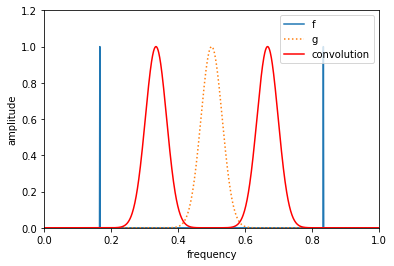

In [15]:
#plot the results
pl.plot(t,f, label='f')
pl.plot(t,g, ':', label='g')
pl.plot(t,conv,"r", label='convolution')
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency")
pl.ylabel("amplitude")
#pl.title("f (blue), g(green), and the convolution of these (red)")
pl.show()

In [16]:
# Roll the function g by the Nyquist frequency to shift it
conv_shift = convolution(f,np.roll(g,int(N/2)))

/usr/local/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:23: ComplexWarning: Casting complex values to real discards the imaginary part


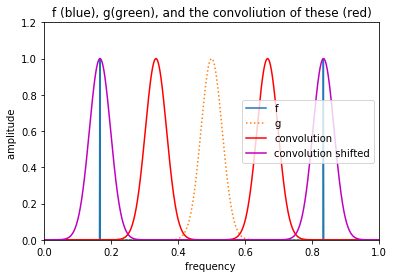

In [17]:
#plot it
pl.plot(t,f, label='f')
pl.plot(t,g, ':', label='g')
pl.plot(t,conv,"r", label='convolution')
pl.plot(t,conv_shift,"m", label='convolution shifted')
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency ")
pl.ylabel("amplitude ")
pl.title("f (blue), g(green), and the convoliution of these (red)")
pl.show()

In [19]:
def fft_convolve(f,g):
    
    FFTf = fourier(f)
    FFTg = fourier(g)
    conv = inv_fourier(FFTf*FFTg)
    return conv

In [20]:
#Try it
conv = fft_convolve(f,np.roll(g,int(N/2)))
npconv = fft_convolve(f,np.fft.fftshift(g))

Given the typical need to center convolutions this way, numpy has an "fftshift" function built in (instead of using the roll function). The fftshift computes the Nyquist frequency if the lenght of the vector is even, and shifts by that amount, so that the zero-frequency component is at the center of the spectrum.

Speed is a big issue in convolutions.  Conveniently there is a way to massively accelerate this algorythem using the FFT with the convolution theorem:
$$(f * g) = iFFT(FFT(f) * FFT(g)). $$
In other words the convoluiton is the inverse fourier transform of the product of the fourier transforms of the two functions.

In [21]:
#plot it
pl.plot(t,f, label='f')
pl.plot(t,g, ':', label='g')
pl.plot(t,conv,':r', label="convolution with roll")
pl.plot(t,npconv,'--m', label="convolution with fftshift")
plt.legend(loc='best')
pl.axis([np.min(t),np.max(t),0,1.2])

pl.xlabel("frequency")
pl.ylabel("amplitude")
pl.show()

<font color='red'>HW Question 3: Dot-com Bubble </font>

    Download the NASDAQ data. Using convolutions and/or filters, identify whether the data contain any useful information about the 2001 dot com bubble in the NASDAQ daily closing values.

    Hint: Use Pandas to read in and organize tbe data:

        nasdaq_data = pd.read_csv('nasdaq_data.csv', index_col='Date',parse_dates=['Date'])
        nasdaq_data.head()
        date = nasdaq_df.index
        close = nasdaq_data['Close']

#### Statistics of Random Variables

Random variables are drawn from distributions. There is a difference between a distribution function and a probably density function:

In [22]:
from scipy.stats import norm

x = np.linspace(norm.ppf(0.01),norm.ppf(0.99), 100) #decide how far to plot in terms of "sigmas" above and below the mean.

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax[0].plot(x, norm.pdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax[0].set_title('Normal Density Function')
ax[0].set_xlabel('X')
ax[1].plot(x, norm.cdf(x),'r-', lw=5, alpha=0.6, label='norm pdf')
ax[1].set_title('Normal Distribution Function')
ax[1].set_xlabel('X')

Text(0.5,0,'X')

Suppose $X$ and $Y$ are two independent discrete random variables with distribution functions $m_1(x)$ and $m_2(x)$. Let $Z = X + Y$ . We would like to determine the distribution function $m_3(x)$ of $Z$. To do this, it is enough to determine the probability that $Z$ takes on the value $z$, where $z$ is an arbitrary integer. Suppose that $X = k$,
where $k$ is some integer. Then $Z = z$ if and only if $Y = z − k$. So the event $Z = z$ is the union of the pairwise disjoint events:

$$P(Z = z) = \sum_{k=-\infty}^{\infty} P(X = k) \star P(Y = z − k) $$

To summarize, if $X$ and $Y$ are two independent integer-valued random variables, with distribution functions $m_1(x)$ and $m_2(x)$ respectively. Then the convolution of $m_1(x)$ and $m_2(x)$ is the distribution function $m_3 = m_1 \star m_2$ given by: 

$$m_3(j) = \sum_k m_1(k) \star m_2(j − k)$$ 

for j = ..., −2, −1, 0, 1, 2, ....

What about the case where we calculate the distribution function for the case of convolving two Gaussians?. Many will already know the result. If the two Gaussians have means $\mu_1$ and $\mu_2$ and variances $\sigma_1$ and $\sigma_2$, the convolved Gaussian is again a normal density, with mean $\mu_1$ + $\mu_2$ and variance $\sigma^2_1$ + $\sigma^2_2$. We can show this by simply writing down the convolution analytically. In the following case, we use the standard and simplest normal with $\mu=0$ and $\sigma = 1$.

$$f_X(x) = f_Y(y) = \frac{1}{\sqrt{2\pi}}e^{-x^2/2}$$

$$f_Z(z) = f_X \star f_Y(z)$$

$$=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}e^{-(z-y)^2/2}e^{-y^2/2}dy$$

$$=\frac{1}{\sqrt{2\pi}}e^{-z^2/4}\sqrt{\pi}\left[ \frac{1}{\sqrt{\pi}}\int_{-\infty}^{\infty}e^{-(y-z/2)^2}dy\right] $$

The last expression in the brackets equals 1, since it is the integral of the normal density function with $\mu=0$ and $\sigma =\sqrt{2}$. So,we have:

$$f_Z(z)  = \frac{1}{\sqrt{4\pi}}e^{-z^2/4}$$


Finally, consider briefly the distribution of the sum of n $\rm {\bf independent}$ random variables, all having the same density function. If $X_1, X_2, ..., X_n$ are these random variables and $S_n = X_1 + X_2 + ··· + X_n$ is their sum, then the distribution function of their sum is:

$$f_{S_n}(x)=(f_{X_1} \star f_{X_2} \star···\star f_{X_n} ) (x) $$

where the right-hand side is an n-fold convolution. 

<font color='red'>HW Question 4: The Central Limit Thereom </font>

    In each of the following cases, assume that all X_i come from the same distribution function as stated below. 
          4a. Write down the distribution function (DF) for each case. 
          4b. Plot the DF and the probablity density for each case. 
          4c. Plot the n-fold convolution for multiple values of n. 
          4d. Show that for large enough n, the n-fold convolution is mostly Gaussian.
          4e. Explain why is this important.

   Case 1: the $X_i$ are uniformly distributed on the interval [0, 1]. 
   
   Case 2: the $X_i$ are distributed normally, with mean 0 and variance 1.
   
   Case 3: the $X_i$ are all exponentially distributed, with mean 1/λ.